# Trabajo Práctico Nº 1
## Objetivos

- Implementar y analizar el filtro de promedio móvil (moving average) en Python.
- Aplicar el concepto de convolución en señales digitales.
- Familiarizarse con el entorno de desarrollo en Python notebooks.
- Comparar representación en punto flotante vs punto fijo, evaluando precisión y tiempos de cómputo.

# Ejercicio 1 - Filtro Moving Average

1. Implementá un algoritmo de promedio móvil (moving average) según la definición vista en clase, que reciba como parámetros:

- La señal de entrada.
- El tamaño de la ventana.

A partir de tu implementación, obtené y graficá la respuesta impulsiva del sistema (lo que en clase llamamos su “firma” o función de transferencia).

2. Respondé:

- ¿Cómo se obtiene la respuesta impulsiva de cualquier sistema?
- ¿Qué representa en el caso del filtro de promedio móvil?

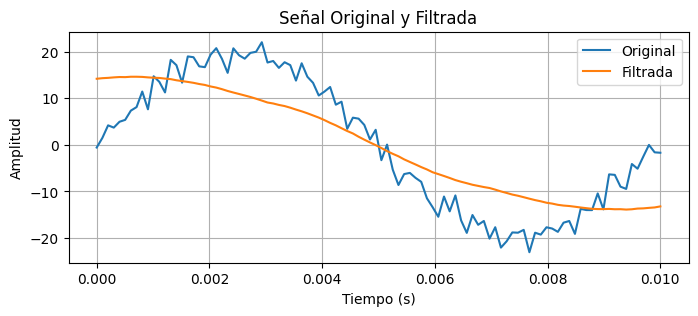

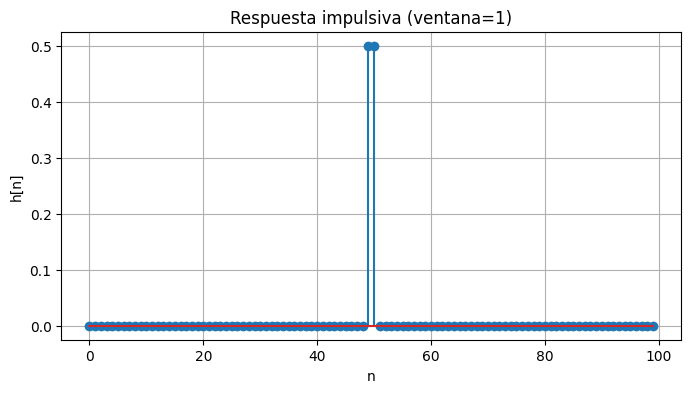

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#1. Implementá un algoritmo de promedio móvil (moving average) según la definición vista en clase, que reciba como parámetros:
# La señal de entrada.
# El tamaño de la ventana.

# ------------------------------------------------------------------------------------------------
# DEFINICIÓN PROMEDIO MOVIL(MOVING AVERAGE):
# ------------------------------------------------------------------------------------------------
def moving_average(señal_entrada, tamaño_ventana): # incluyo parametro señal de entrada y tamaño de la ventana
  avg = np.zeros(len(señal_entrada))
  for n in range(len(señal_entrada)):
    suma = 0
    d = 0
    for k in range (-(tamaño_ventana), tamaño_ventana):
        if ((n-k) > 0) and ((n-k) < (len(señal_entrada))):
            suma = suma + señal_entrada[(n-k)]
            d = d+1
    avg[n] = np.copy(suma/d)
  return avg

# ------------------------------------------------------------------------------------------------
# EJEMPLO:
# ------------------------------------------------------------------------------------------------
#GENERACIÓN BASE DE TIEMPO
Fs = 10000                        # Frecuencia de muestreo (Hz)
N = 100                           # Número de muestras
t = np.linspace(0,N/Fs,N)         # Base de tiempo

#GENERACIÓN SEÑAL DE PRUEBA
f1 = 100                                # Frecuencia de muestreo (Hz)
A1 = 20                                  # Amplitud
signal_1 = A1 * np.sin(2*np.pi*f1*t)    # Almacenamiento

#GENERACIÓN SEÑAL CON RUIDO
señal_con_ruido= signal_1 + np.random.normal(0,2,len(signal_1))

#APLICACION MEDIA MOVIL
averaged = moving_average(señal_con_ruido, 30)

# Visualizar la señal original y filtrada
plt.figure(figsize=(8, 3))
plt.plot(t, señal_con_ruido, label='Original')
plt.plot(t, averaged, label='Filtrada')
plt.title('Señal Original y Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


#A partir de tu implementación, obtené y graficá la respuesta impulsiva del sistema (lo que en clase llamamos su “firma” o función de transferencia).

# -----------------------------
# GENERACIÓN DELTA DE DIRAC
# -----------------------------
def generar_delta_dirac(cantidad, pos):
    if pos >= cantidad:
        return 'Error: posición fuera de rango'
    delta = [0]*cantidad
    delta[pos] = 1
    return delta

long_BT = 100 #longitud base de tiempo
tamaño_ventana = 1
delta_dirac = generar_delta_dirac(long_BT, long_BT//2)


# ------------------------------------------------------------------------------------------------
# RESPUESTA IMPULSIVA DEL SISTEMA (lo que en clase llamamos su “firma” o función de transferencia):
# ------------------------------------------------------------------------------------------------
respuesta_impulsiva = moving_average(delta_dirac, tamaño_ventana)


# ------------------------------------------------------------------------------------------------
# IMPRIMIR RESPUESTA IMPULSIVA:
# ------------------------------------------------------------------------------------------------
plt.figure(figsize=(8,4))
plt.stem(respuesta_impulsiva)
plt.title(f'Respuesta impulsiva (ventana={tamaño_ventana})')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)
plt.show()

2. Respondé:

- ¿Cómo se obtiene la respuesta impulsiva de cualquier sistema?

Se obtiene a partir de convolucionar en el tiempo una señal delta de Dirac con la señal de entrada.

- ¿Qué representa en el caso del filtro de promedio móvil?

Representa, tal como se ve en la figura "Señal original y filtrada", un filtro pasa bajos, ya que elimina las componentes de alta frecuencia de la señal original "ruido".



# Ejercicio 2 - Respuesta del sistema

1. Genera dos señales de prueba:
    - Una onda cuadrada de amplitud 1 y frecuencia de 2 kHz.
    - Una onda triangular de amplitud 1 y frecuencia de 1 kHz.

Aplica el moving average implementado en el Ejercicio 1 a estas señales.

2. Analiza los resultados:

    - Grafica la señal original y la señal filtrada.
    - Explica qué cambios observas en la forma de onda.

3. Escribe tus conclusiones: ¿qué efecto tiene el filtro de promedio móvil sobre cada señal?


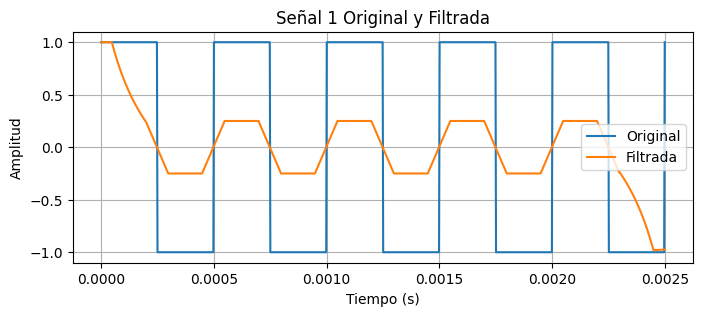

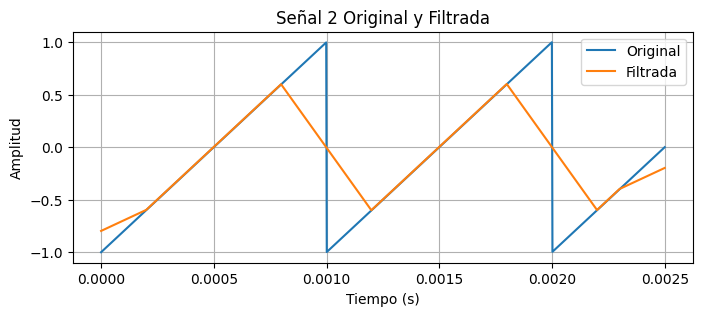

In [3]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------------------------
# 1. GENERA DOS SEÑALES DE PRUEBA:
# ------------------------------------------------------------------------------------------------
N = 1000                                # Número de muestras
BT  = np.linspace(0, 0.0025, N)         # BASE DE TIEMPO

# ------------------------------------------------------------------------------------------------
# ONDA CUADRADA DE AMPLITUD 1 Y FRECUENCIA 2kHz:
# ------------------------------------------------------------------------------------------------
frec = 2000  # Frecuencia de 2 kHz
señal_cuad_1 = sig.square(2 * np.pi * frec * BT)

# ------------------------------------------------------------------------------------------------
# ONDA TRIANGULAR DE AMPLITUD 1 Y FRECUENCIA 1kHz:
# ------------------------------------------------------------------------------------------------
frec = 1000   # Frecuencia 1 kHz
señal_cuad_2 = sig.sawtooth(2 * np.pi * frec * BT)

# ------------------------------------------------------------------------------------------------
# APLICA EL MOVING AVERAGE IMPLEMENTADO EN EL EJERICIO 1 A ESTAS SEÑALES:
# La deficion de media movil ya fue definida en la celda anterior(ejecutar la celda anterior primero)
# ------------------------------------------------------------------------------------------------
respuesta_filtrada_1 = moving_average(señal_cuad_1, 80)
respuesta_filtrada_2 = moving_average(señal_cuad_2, 80)

# ------------------------------------------------------------------------------------------------
# IMPRIMIR SEÑAL 1 ORIGINAL Y FILTRADA:
# ------------------------------------------------------------------------------------------------
plt.figure(figsize=(8, 3))
plt.plot(BT, señal_cuad_1, label='Original')
plt.plot(BT, respuesta_filtrada_1, label='Filtrada')
plt.title('Señal 1 Original y Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------------------------------------------
# IMPRIMIR SEÑAL 2 ORIGINAL Y FILTRADA:
# ------------------------------------------------------------------------------------------------
plt.figure(figsize=(8, 3))
plt.plot(BT, señal_cuad_2, label='Original')
plt.plot(BT, respuesta_filtrada_2, label='Filtrada')
plt.title('Señal 2 Original y Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

3. Escribe tus conclusiones: ¿qué efecto tiene el filtro de promedio móvil sobre cada señal?


Para la señal de 1:

En cuanto a la forma de onda pierde casi por completo su forma cuadrada. Los flancos (subidas y bajadas) son extremadamente largos y suaves. Mientras que la amplitud sufre una atenuación severa. En este caso, el filtro promedia una gran cantidad de puntos, incluyendo las zonas negativas y positivas, lo que resulta en una amplitud máxima significativamente menor que la original.


Para la señal 2:

En cuanto a la forma de onda la zona de bajada abrupta se ve completamente deformada por una pendiente de bajada mucho menos abrupta. Mientras que la amplitud sufre una atenuación severa, aunque la atenuación es ligeramente menor que en la cuadrada.


# Ejercicio 3 - Convolución en punto flotante y punto fijo

1. Implementa un algoritmo de convolución:

    - En punto flotante (float).
    - En punto fijo, utilizando por ejemplo la librería fixedpoint.

2. Compara los resultados con la función de NumPy np.convolve. Mide y compara:

    - El tiempo de ejecución usando timeit.
    - El error de la salida respecto al cálculo en punto flotante.

3. Conclusión:

    - ¿Qué diferencias observas entre las implementaciones?
    - ¿Qué ventajas y desventajas tiene usar punto fijo en lugar de punto flotante?

# Ejercicio 3 - Convolución en punto flotante y punto fijo

1. Implementa un algoritmo de convolución:

    - En punto flotante (float).
    - En punto fijo, utilizando por ejemplo la librería fixedpoint.

In [5]:
!pip install fixedpoint

Convertido a float: [1.5, 2.0, 4.5, 1.0, 6.0]


<StemContainer object of 3 artists>

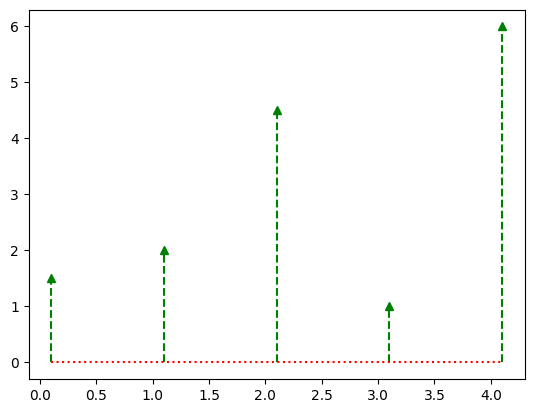

In [9]:
#1) Implementa un algoritmo de convolución:
# -----------------------------
# CONVOLUCIÓN EN PUNTO FIJO
# -----------------------------
from __future__ import division
import numpy as np
from fixedpoint import FixedPoint

# -----------------------------
# FUNCIONES AUXILIARES
# -----------------------------
def fixedToFloat(array):  # Convierte un array de FixedPoint a lista de floats.
    result = []
    for num in array:
        result.append(float(num))
    return result

def arrayFixedPointValue(initial_value, fx_array_len, qformat):   #Crea un array de punto fijo con initial_value en todas sus posiciones.
    fx_type = FixedPoint(initial_value, **qformat)
    fx_array = [FixedPoint(initial_value, **qformat) for _ in range(fx_array_len)]
    return fx_array

def arrayFixedPoint(initial_array, qformat): #Convierte un array de floats a FixedPoint con formato qformat.
    fx_array = []
    for num in initial_array:
        fx_num = FixedPoint(num, **qformat)
        fx_array.append(fx_num)
    return fx_array

# -----------------------------
# DEFINICIÓN CONVOLUCIÓN EN PUNTO FIJO
# -----------------------------
def convolucion_fixed(x, h, qformat):
    """Convolución discreta en punto fijo."""
    N = len(x)
    M = len(h)
    y_len = N + M - 1

    # Convierte entradas a punto fijo
    x_fx = arrayFixedPoint(x, qformat)
    h_fx = arrayFixedPoint(h, qformat)

    # Inicializa salida en punto fijo
    y_fx = arrayFixedPointValue(0, y_len, qformat)

    for n in range(y_len):
        acc = FixedPoint(0, **qformat)
        for k in range(N):
            if 0 <= n-k < M:
                acc += x_fx[k] * h_fx[n-k]
        y_fx[n] = acc
    return y_fx

# Señales de ejemplo
x = [1.0, 2.05, 3.0]
h = [1.5, -1.0, 2.0]

# Defino formato Q -> 3 bits enteros + 3 bits fraccionarios
qformat = {'signed': True, 'm': 3, 'n': 3}

# Convolución en fixed
y_fixed = convolucion_fixed(x, h, qformat)
y0 = fixedToFloat(y_fixed)

# -----------------------------
# IMPRIMIR RESULTADO
# -----------------------------
print("Convertido a float:", y0)

n_indices = np.arange(len(y_fixed))

# Gráfica de la convolución en punto fijo (Comparación)
plt.stem(n_indices + 0.1, y_fixed, linefmt='g--', markerfmt='g^', basefmt='r:', label=f'Punto Fijo Q({qformat["m"]}, {qformat["n"]})')

1.5
2.0749999999999997
4.45
1.0999999999999996
6.0


<StemContainer object of 3 artists>

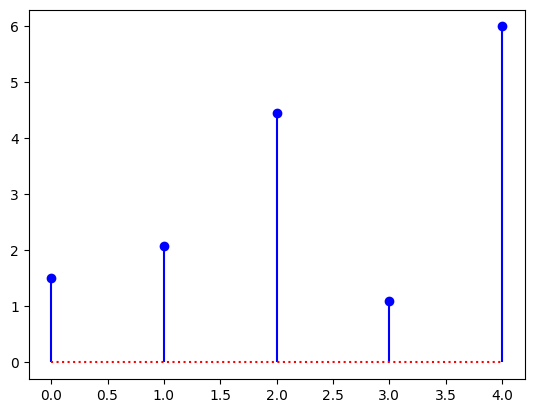

In [8]:
#1)
# -----------------------------
# CONVOLUCIÓN EN PUNTO FLOTANTE
# -----------------------------
import numpy as np

# ------------------------------------------------------------------------------------------------
# DEFINICIÓN CONVOLUCIÓN EN PUNTO FLOTANTE:
# ------------------------------------------------------------------------------------------------
def convolucion_float(x, h):
    N = len(x)
    M = len(h)
    y = np.zeros(N + M - 1, dtype=float)

    for n in range(len(y)):
        for k in range(N):
            if 0 <= n-k < M:
                y[n] += x[k] * h[n-k]
    return y

# -----------------------------
# EJEMPLO
# -----------------------------
x = [1.0, 2.05, 3.0]  #Señal 1
h = [1.5, -1.0, 2.0]  #Señal 2

#Aplicación de Convolución
y = convolucion_float(x, h)

# -----------------------------
# IMPRIMIR RESULTADO
# -----------------------------
print(y[0])
print(y[1])
print(y[2])
print(y[3])
print(y[4])

n_indices = np.arange(len(y))
# Gráfica de la convolución en punto flotante (Referencia)
plt.stem(n_indices, y, linefmt='b-', markerfmt='bo', basefmt='r:', label='Punto Flotante (Referencia)')

2. Compara los resultados con la función de NumPy np.convolve. Mide y compara:

    - El tiempo de ejecución usando timeit.
    - El error de la salida respecto al cálculo en punto flotante.

In [ ]:
import timeit
import time
import numpy as np

# -----------------------------
# TIEMPO DE EJECUCIÓN USANDO TIMEIT
# -----------------------------
start = time.time()
y_flotante = convolucion_float(x,h)
end = time.time()
print ("punto flotante",(end-start)*100000)

start = time.time()
y_fixed = convolucion_fixed(x, h, qformat)
end = time.time()
print ("punto fijo",(end-start)*100000)
y0 = fixedToFloat(y_fixed)

start = time.time()
y_np = np.convolve(x,h)
end = time.time()
print ("numpy",(end-start)*100000)


# -----------------------------
# ERROR DE LA SALIDA RESPECTO AL CÁLCULO EN PUNTO FLOTANTE
# -----------------------------
#print((y0 - y_np)/y_np*100)

error_mse = np.mean((y0 - y_np)**2) #Error Cuadrático Medio (MSE: Mean Squared Error), a partir de la funcion media aritmetica

print(f"\nError MSE (Fixed vs. Float): {error_mse:.10e}")

punto flotante 11.110305786132812
punto fijo 180.41133880615234
numpy 15.44952392578125

Error MSE (Fixed vs. Float): 3.6250000000e-03


3)Conclusión:
¿Qué diferencias observas entre las implementaciones?

La principal diferencia entre punto fijo y punto flotante está en el tiempo de ejecución y la precisión. El punto fijo es más rápido de implementar, consume menos recursos y energía, lo que lo hace ideal para sistemas en tiempo real. Sin embargo, sacrifica precisión.

El punto flotante, en cambio, ofrece mucha más precisión, pero requiere más memoria, mayor potencia de cómputo y un costo de hardware más alto, además de ser más complejo de desarrollar.

¿Qué ventajas y desventajas tiene usar punto fijo en lugar de punto flotante?

El punto fijo tiene como ventajas un menor consumo de recursos de software y hardware, menor uso de memoria y energía, y mejor desempeño en aplicaciones en tiempo real. Sin embargo, su desventaja es menor precisión en comparación con el punto flotante, que brinda mayor exactitud aunque con mayor costo, complejidad y consumo de recursos.
